In [34]:
# Import the necessary library we need for our data preparation: pandas package:
import pandas as pd

In [35]:
# Read in csv file containing data from consumer survey:
production = pd.read_csv('data/organic_production_eu.csv')

In [37]:
# Show dataframe:
production

,DATAFLOW,LAST UPDATE,freq,crops,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,C0000,T,BE,2016,32001.0,NaN
1,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,C0000,T,BE,2017,43500.0,NaN
2,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,C0000,T,BE,2018,46188.0,NaN
3,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,C0000,T,BE,2019,46441.0,NaN
4,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,C0000,T,BE,2020,54492.0,NaN
...,...,...,...,...,...,...,...,...,...
2129,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,W1000,T,UK,2015,647.0,NaN
2130,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,W1000,T,UK,2016,598.0,NaN
2131,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,W1000,T,UK,2017,562.0,NaN
2132,ESTAT:ORG_CROPPRO(1.0),16/02/24 11:56:00,A,W1000,T,UK,2018,708.0,NaN


In [38]:
# Show dataframe info:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     2134 non-null   object 
 1   LAST UPDATE  2134 non-null   object 
 2   freq         2134 non-null   object 
 3   crops        2134 non-null   object 
 4   unit         2134 non-null   object 
 5   geo          2134 non-null   object 
 6   TIME_PERIOD  2134 non-null   int64  
 7   OBS_VALUE    2079 non-null   float64
 8   OBS_FLAG     134 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 150.2+ KB


In [39]:
production_clean = production.drop(['DATAFLOW', 'LAST UPDATE','freq',
                                    'OBS_FLAG','unit','crops'], axis=1)
production_clean

,geo,TIME_PERIOD,OBS_VALUE
0,BE,2016,32001.0
1,BE,2017,43500.0
2,BE,2018,46188.0
3,BE,2019,46441.0
4,BE,2020,54492.0
...,...,...,...
2129,UK,2015,647.0
2130,UK,2016,598.0
2131,UK,2017,562.0
2132,UK,2018,708.0


In [40]:
production_clean = production_clean.rename(columns={'geo': 'country_ID', 'TIME_PERIOD': 'year',
                                         'OBS_VALUE': 'WT_1000'})

<BarContainer object of 2134 artists>

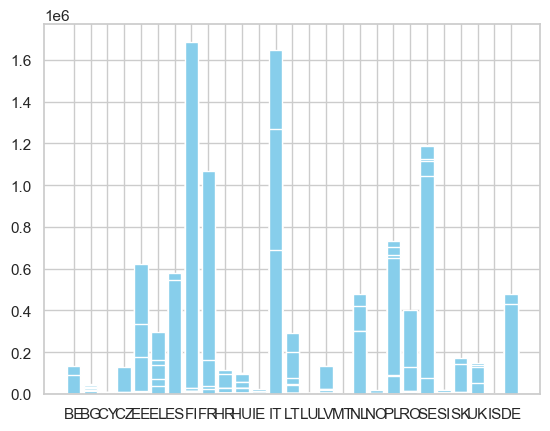

In [42]:
# Let's make a diagram, for this we import library matplotlib
import matplotlib.pyplot as plt
plt.bar(production_clean['country_ID'], production_clean['WT_1000'], color='skyblue')

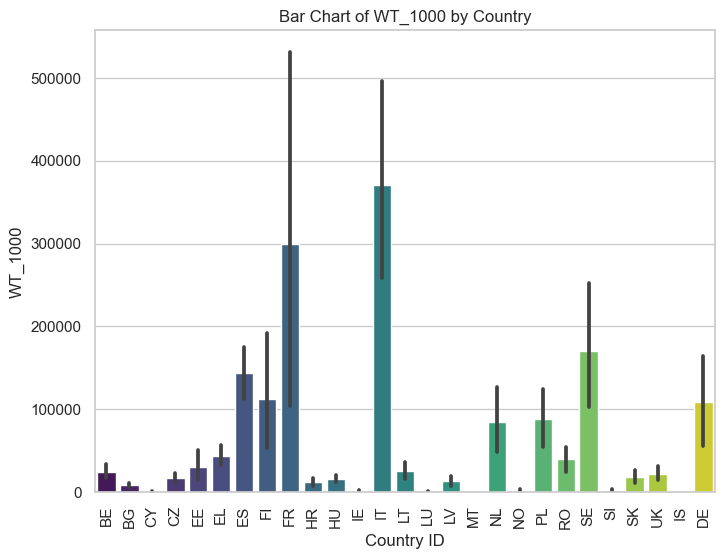

In [43]:
# import seaborn
import seaborn as sns
# setting the style seaborn
sns.set(style="whitegrid")
# building a barchart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='country_ID', y='WT_1000', data=production_clean, palette='viridis')
plt.xlabel('Country ID')
plt.ylabel('WT_1000')
plt.title('Bar Chart of WT_1000 by Country')
plt.xticks(rotation=90)
plt.show()

In [44]:
production_clean

,country_ID,year,WT_1000
0,BE,2016,32001.0
1,BE,2017,43500.0
2,BE,2018,46188.0
3,BE,2019,46441.0
4,BE,2020,54492.0
...,...,...,...
2129,UK,2015,647.0
2130,UK,2016,598.0
2131,UK,2017,562.0
2132,UK,2018,708.0


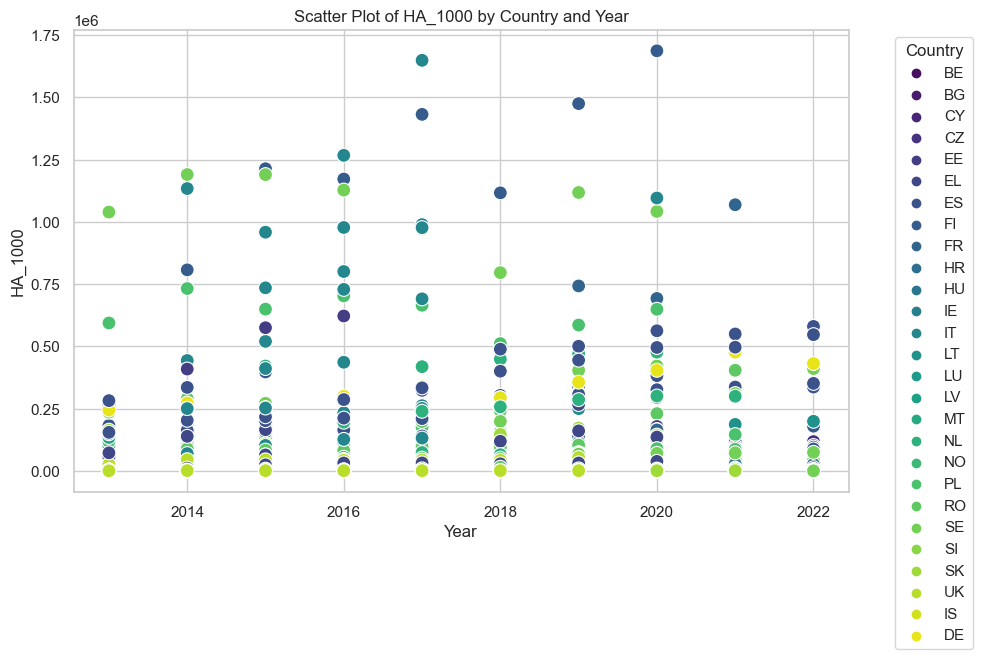

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='WT_1000', hue='country_ID', data=production_clean, palette='viridis', s=100)
plt.xlabel('Year')
plt.ylabel('WT_1000')
plt.title('Scatter Plot of WT_1000 by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


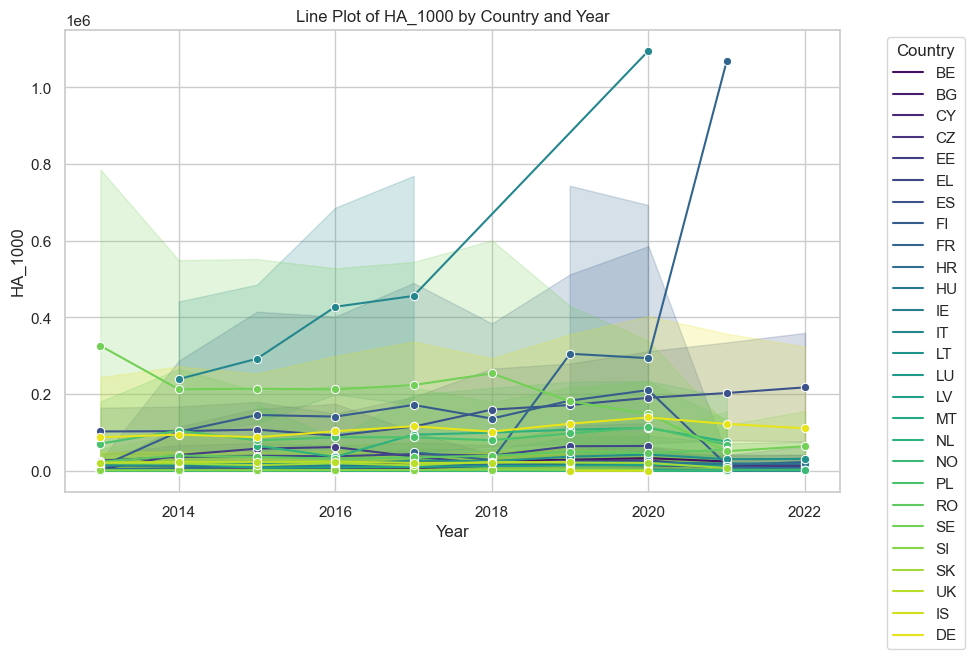

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='WT_1000', hue='country_ID', data=production_clean, palette='viridis', marker='o')
plt.xlabel('Year')
plt.ylabel('WT_1000')
plt.title('Line Plot of WT_1000 by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Figure size 1000x600 with 0 Axes>

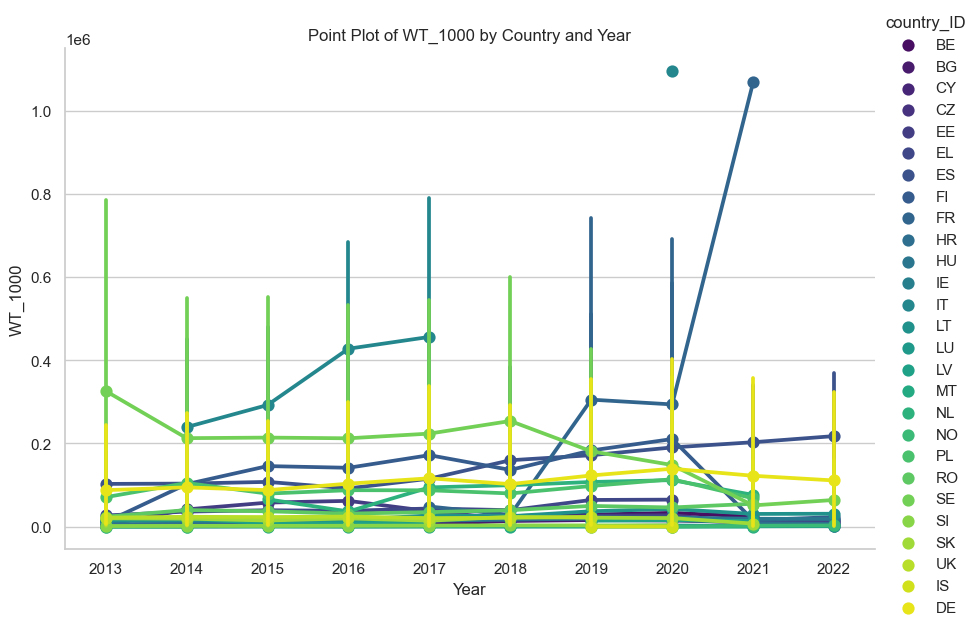

In [45]:
plt.figure(figsize=(10, 6))
sns.catplot(x='year', y='WT_1000', hue='country_ID', data=production_clean, kind='point', palette='viridis', height=6, aspect=1.5)
plt.xlabel('Year')
plt.ylabel('WT_1000')
plt.title('Point Plot of WT_1000 by Country and Year')
plt.show()

In [47]:
# Ensure 'year' column is of integer type
production_clean['year'] = production_clean['year'].astype(int)

# Convert 'country_ID' to categorical type
production_clean['country_ID'] = pd.Categorical(production_clean['country_ID'])


/var/folders/c2/rl_78_9s4w33przf0305h6y00000gn/T/ipykernel_3056/4155732039.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_wt_by_country = production_clean.groupby('country_ID')['WT_1000'].sum()


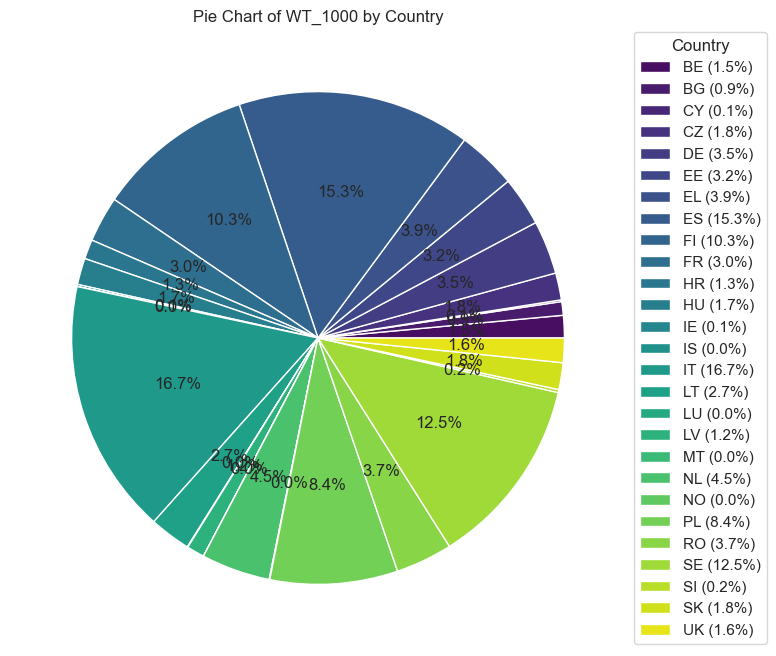

In [54]:
# Set the style in Seaborn
sns.set(style="whitegrid")

# Sum 'WT_1000' values for each country
sum_wt_by_country = production_clean.groupby('country_ID')['WT_1000'].sum()

# Calculate percentages
percentages = (sum_wt_by_country / sum_wt_by_country.sum()) * 100

# Plot pie chart with a longer color palette
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=None, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(sum_wt_by_country)))
plt.title('Pie Chart of WT_1000 by Country')

# Create legend with percentages
legend_labels = [f"{country} ({percent:.1f}%)"
                 for country, percent in zip(sum_wt_by_country.index, percentages)]
plt.legend(labels=legend_labels, title='Country', bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

In [55]:
import sql_functions as sqlf
engine = sqlf.get_engine()
schema = 'capstone_organicfood'
table_name = 'organic_production_eu'
import psycopg2

In [58]:
if engine!=None:
    try:
        production_clean.to_sql(name=table_name, # name of SQL table variable
                        con=engine, # engine or connection
                        schema=schema, # our class schema variable
                        if_exists='replace', # Drop the table before inserting new values
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
else:
    print('No engine')

The organic_production_eu table was imported successfully.


In [57]:
# Test: query the newly created table to count the rows (we know from above that the dataframe has 108 cases):
sqlf.get_dataframe(f'SELECT COUNT(*) FROM {schema}.organic_production_eu;')

,count
0,2134
